Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random
import math

Average channel conductances (mS / mm^2)

In [2]:
g_L = 0.003
g_K = 0.36
g_Na = 1.2

Potentials (mV)

In [3]:
E_L = -54.387
E_K = -77.0
E_Na = 50.0

Membrane capacitance per unit area (nF/mm^2)

In [4]:
Cm = 10.0

Initial state

In [5]:
Vm_0 = -65.0

Equations for m, n и h:


In [6]:
def alpha_n(V):
    return (0.01 * (V + 55)) / (1 - np.exp(-0.1 * (V + 55)))

def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))

def alpha_m(V):
    return (0.1 * (V + 40)) / (1 - np.exp(-0.1 * (V + 40)))

def beta_m(V):
    return 4 * np.exp(-0.0556 * (V + 65))

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65))

def beta_h(V):
    return 1.0 / (1 + np.exp(-0.1 * (V + 35)))

def n_inf(V=Vm_0):
    return alpha_n(V) / (alpha_n(V) + beta_n(V))

def m_inf(V=Vm_0):
    return alpha_m(V) / (alpha_m(V) + beta_m(V))

def h_inf(V=Vm_0):
    return alpha_h(V) / (alpha_h(V) + beta_h(V))

Derivatives

In [7]:
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    V = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    G_L = (g_L / Cm * 1000)
    G_K = (g_K / Cm * 1000) * np.power(n, 4.0)
    G_Na = (g_Na / Cm * 1000) * np.power(m, 3.0) * h

    
    dy[0] = (Id(t0) / Cm * 10) - (G_L * (V - E_L)) - (G_K * (V - E_K)) - (G_Na * (V - E_Na))
    
    dy[1] = (alpha_n(V) * (1.0 - n)) - (beta_n(V) * n)
    
    dy[2] = (alpha_m(V) * (1.0 - m)) - (beta_m(V) * m)
    
    dy[3] = (alpha_h(V) * (1.0 - h)) - (beta_h(V) * h)
    
    return dy

Initial state

In [8]:
Y = np.array([Vm_0, n_inf(), m_inf(), h_inf()])

First simulation - definition of stimulus and lenghts

In [9]:
#st = random.sample(range(5, 50), 4)
#st.sort()
#len_st = random.sample(range(20, 100), 4)
#len_st.sort()
st = [7, 20, 35, 50]
len_st = [35, 50, 65, 80]

st_start = []
st_end = []
for i in range(len(len_st)):
  if i == 0:
    st_start.append(10)
    st_end.append(len_st[0] + 10)
  else:
    st_start.append(st_end[i-1] + 50)
    st_end.append(st_start[i] + len_st[i])
tmin = 0
tmax = st_end[3] + 10
T = np.linspace(tmin, tmax, 10000)

In [10]:
def Id(t):
  if st_start[0] <= t < st_end[0]:
    return st[0]
  elif st_start[1] <= t < st_end[1]:
    return st[1]
  elif st_start[2] <= t < st_end[2]:
    return st[2]
  elif st_start[3] <= t < st_end[3]:
    return st[3]
  return 0.0

Computation

In [11]:
Ey = odeint(compute_derivatives, Y, T)

Graphs (first simulation)

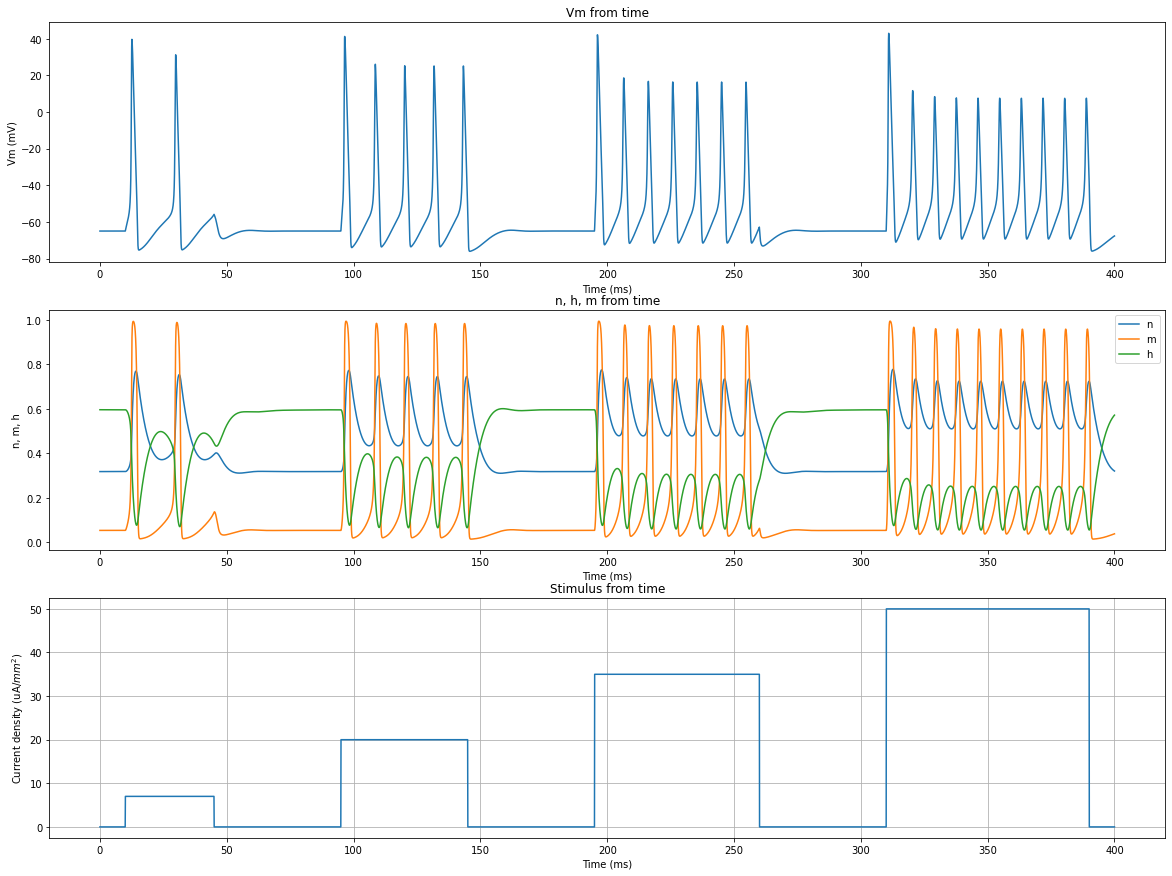

In [12]:
Idv = [Id(t) for t in T]

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (20,15))
ax1.plot(T, Ey[:, 0])
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Vm (mV)')
ax1.set_title('Vm from time')
plt.grid()

ax2.plot(T, Ey[:, 1], label = 'n')
ax2.plot(T, Ey[:, 2], label = 'm')
ax2.plot(T, Ey[:, 3], label = 'h')
ax2.legend()
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('n, m, h')
ax2.set_title('n, h, m from time')
plt.grid()

ax3.plot(T, Idv)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel(r'Current density (uA/$mm^2$)')
ax3.set_title('Stimulus from time')
plt.grid()

Gap definitions

In [13]:
gap_1 = []
gap_2 = []
gap_3 = []
gap_4 = []

for i in range(len(Idv)):
  if Idv[i] == st[0]:
    gap_1.append(i)
  elif Idv[i] == st[1]:
    gap_2.append(i)
  elif Idv[i] == st[2]:
    gap_3.append(i)
  elif Idv[i] == st[3]:
    gap_4.append(i)

Phase spaces

Text(0.5, 1.0, 'Vm - h')

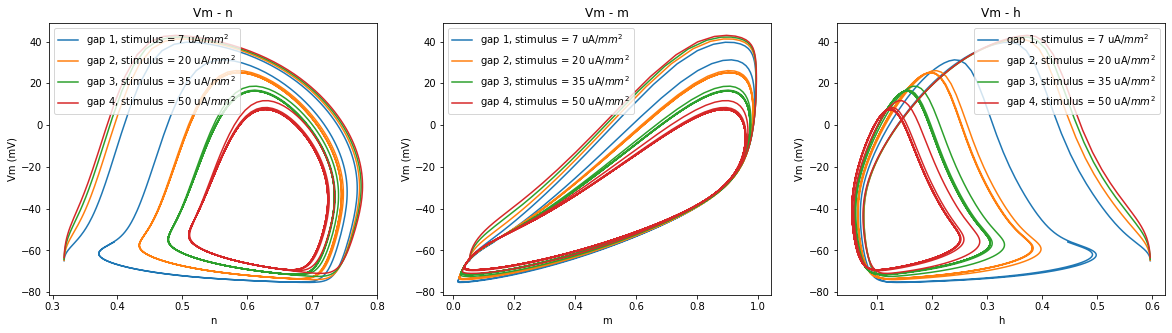

In [14]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 5))

ax1.plot(Ey[min(gap_1):max(gap_1), 1], Ey[min(gap_1):max(gap_1), 0], label = str('gap 1, stimulus = ' + str(st[0]) + ' uA/$mm^2$'))
ax1.plot(Ey[min(gap_2):max(gap_2), 1], Ey[min(gap_2):max(gap_2), 0], label = str('gap 2, stimulus = ' + str(st[1]) + ' uA/$mm^2$'))
ax1.plot(Ey[min(gap_3):max(gap_3), 1], Ey[min(gap_3):max(gap_3), 0], label = str('gap 3, stimulus = ' + str(st[2]) + ' uA/$mm^2$'))
ax1.plot(Ey[min(gap_4):max(gap_4), 1], Ey[min(gap_4):max(gap_4), 0], label = str('gap 4, stimulus = ' + str(st[3]) + ' uA/$mm^2$'))
ax1.legend()
ax1.set_xlabel('n')
ax1.set_ylabel('Vm (mV)')
ax1.set_title('Vm - n')

ax2.plot(Ey[min(gap_1):max(gap_1), 2], Ey[min(gap_1):max(gap_1), 0], label = str('gap 1, stimulus = ' + str(st[0]) + ' uA/$mm^2$'))
ax2.plot(Ey[min(gap_2):max(gap_2), 2], Ey[min(gap_2):max(gap_2), 0], label = str('gap 2, stimulus = ' + str(st[1]) + ' uA/$mm^2$'))
ax2.plot(Ey[min(gap_3):max(gap_3), 2], Ey[min(gap_3):max(gap_3), 0], label = str('gap 3, stimulus = ' + str(st[2]) + ' uA/$mm^2$'))
ax2.plot(Ey[min(gap_4):max(gap_4), 2], Ey[min(gap_4):max(gap_4), 0], label = str('gap 4, stimulus = ' + str(st[3]) + ' uA/$mm^2$'))
ax2.legend()
ax2.set_xlabel('m')
ax2.set_ylabel('Vm (mV)')
ax2.set_title('Vm - m')

ax3.plot(Ey[min(gap_1):max(gap_1), 3], Ey[min(gap_1):max(gap_1), 0], label = str('gap 1, stimulus = ' + str(st[0]) + ' uA/$mm^2$'))
ax3.plot(Ey[min(gap_2):max(gap_2), 3], Ey[min(gap_2):max(gap_2), 0], label = str('gap 2, stimulus = ' + str(st[1]) + ' uA/$mm^2$'))
ax3.plot(Ey[min(gap_3):max(gap_3), 3], Ey[min(gap_3):max(gap_3), 0], label = str('gap 3, stimulus = ' + str(st[2]) + ' uA/$mm^2$'))
ax3.plot(Ey[min(gap_4):max(gap_4), 3], Ey[min(gap_4):max(gap_4), 0], label = str('gap 4, stimulus = ' + str(st[3]) + ' uA/$mm^2$'))
ax3.legend()
ax3.set_xlabel('h')
ax3.set_ylabel('Vm (mV)')
ax3.set_title('Vm - h')


Second simulation - definition of stimulus and lenghts

In [15]:
#st = random.sample(range(20, 200), 2)
st = [75, 150]
tmax = 200
T = np.linspace(0, tmax, 10000)

In [16]:
def Id(t):
  if t <= 1:
    return 0
  elif t <= 2:
    return st[0]
  elif t <= 3:
    return 0
  elif t <= 4:
    return st[1]
  elif (math.floor(t) + 1) % 2 == 0:
    if (math.floor(t) + 1) % 4 == 0:
      return st[1]
    else:
      return st[0]
  else:
    return 0


Computation

In [17]:
Ey = odeint(compute_derivatives, Y, T)

Graphs (second simulation)

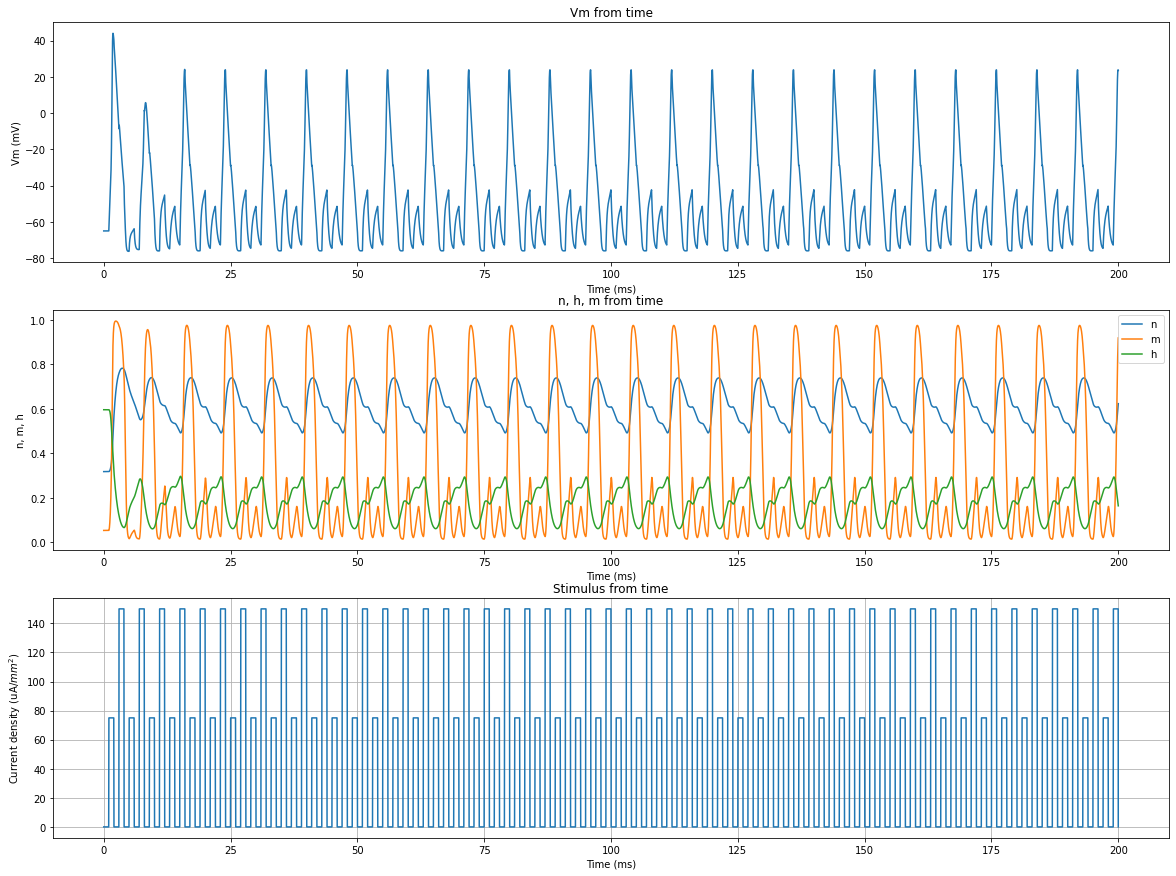

In [18]:
Idv = [Id(t) for t in T]

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (20,15))
ax1.plot(T, Ey[:, 0])
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Vm (mV)')
ax1.set_title('Vm from time')
plt.grid()

ax2.plot(T, Ey[:, 1], label = 'n')
ax2.plot(T, Ey[:, 2], label = 'm')
ax2.plot(T, Ey[:, 3], label = 'h')
ax2.legend()
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('n, m, h')
ax2.set_title('n, h, m from time')
plt.grid()

ax3.plot(T, Idv)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel(r'Current density (uA/$mm^2$)')
ax3.set_title('Stimulus from time')
plt.grid()